# Predicting Musical Category Using Lyrics

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Mining/Wrangling" data-toc-modified-id="Mining/Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mining/Wrangling</a></span><ul class="toc-item"><li><span><a href="#Load-Data-and-Remove-Non-English-Lyrics" data-toc-modified-id="Load-Data-and-Remove-Non-English-Lyrics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data and Remove Non-English Lyrics</a></span></li><li><span><a href="#Get-Genre-Tags-From-Deezer-API" data-toc-modified-id="Get-Genre-Tags-From-Deezer-API-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get Genre Tags From Deezer API</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Fetch-genre-tags-from-Deezer" data-toc-modified-id="Fetch-genre-tags-from-Deezer-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>Fetch genre tags from Deezer</a></span></li><li><span><a href="#Extract-list-of-genres-and-top-genre-from-Deezer-string-of-tags" data-toc-modified-id="Extract-list-of-genres-and-top-genre-from-Deezer-string-of-tags-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>Extract list of genres and top genre from Deezer string of tags</a></span></li><li><span><a href="#Aggregate-and-Rename-Top-Genres-+-Baseline-Accuracy-and-Class-Counts" data-toc-modified-id="Aggregate-and-Rename-Top-Genres-+-Baseline-Accuracy-and-Class-Counts-2.2.0.3"><span class="toc-item-num">2.2.0.3&nbsp;&nbsp;</span>Aggregate and Rename Top Genres + Baseline Accuracy and Class Counts</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#NLP" data-toc-modified-id="NLP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NLP</a></span><ul class="toc-item"><li><span><a href="#Engineer-features-for-training-set" data-toc-modified-id="Engineer-features-for-training-set-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Engineer features for training set</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-numeric-target-variable" data-toc-modified-id="Create-numeric-target-variable-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Create numeric target variable</a></span></li><li><span><a href="#Process-lyrics-to-produce-text-of-Lemmas" data-toc-modified-id="Process-lyrics-to-produce-text-of-Lemmas-3.1.0.2"><span class="toc-item-num">3.1.0.2&nbsp;&nbsp;</span>Process lyrics to produce text of Lemmas</a></span></li><li><span><a href="#Compute-sentiment-of-each-song-using-vader" data-toc-modified-id="Compute-sentiment-of-each-song-using-vader-3.1.0.3"><span class="toc-item-num">3.1.0.3&nbsp;&nbsp;</span>Compute sentiment of each song using vader</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#NLP-and-Modeling" data-toc-modified-id="NLP-and-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>NLP and Modeling</a></span><ul class="toc-item"><li><span><a href="#Import-Cleaned-Lyrics-Dataframe" data-toc-modified-id="Import-Cleaned-Lyrics-Dataframe-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import Cleaned Lyrics Dataframe</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Retokenise-lyrics-after-import" data-toc-modified-id="Retokenise-lyrics-after-import-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Retokenise lyrics after import</a></span></li></ul></li></ul></li><li><span><a href="#Named-Entity-Recognition-by-Genre" data-toc-modified-id="Named-Entity-Recognition-by-Genre-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Named Entity Recognition by Genre</a></span></li><li><span><a href="#Set-target-and-predictors" data-toc-modified-id="Set-target-and-predictors-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Set target and predictors</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Train-Test Split</a></span></li><li><span><a href="#Try-Count-Vectoriser" data-toc-modified-id="Try-Count-Vectoriser-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Try Count Vectoriser</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Word-counts-by-genre" data-toc-modified-id="Word-counts-by-genre-4.5.0.1"><span class="toc-item-num">4.5.0.1&nbsp;&nbsp;</span>Word counts by genre</a></span></li><li><span><a href="#Basic-logistic-regression-model" data-toc-modified-id="Basic-logistic-regression-model-4.5.0.2"><span class="toc-item-num">4.5.0.2&nbsp;&nbsp;</span>Basic logistic regression model</a></span></li><li><span><a href="#More-out-of-the-box-models" data-toc-modified-id="More-out-of-the-box-models-4.5.0.3"><span class="toc-item-num">4.5.0.3&nbsp;&nbsp;</span>More out-of-the-box models</a></span></li></ul></li></ul></li><li><span><a href="#Try-to-improve-with-tf-idf" data-toc-modified-id="Try-to-improve-with-tf-idf-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Try to improve with tf-idf</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Word-Counts" data-toc-modified-id="Word-Counts-4.6.0.1"><span class="toc-item-num">4.6.0.1&nbsp;&nbsp;</span>Word Counts</a></span></li><li><span><a href="#Check-most-correlated-unigrams-and-bigrams-using-Chi-square-statistics" data-toc-modified-id="Check-most-correlated-unigrams-and-bigrams-using-Chi-square-statistics-4.6.0.2"><span class="toc-item-num">4.6.0.2&nbsp;&nbsp;</span>Check most correlated unigrams and bigrams using Chi square statistics</a></span></li><li><span><a href="#Increase-n_grams" data-toc-modified-id="Increase-n_grams-4.6.0.3"><span class="toc-item-num">4.6.0.3&nbsp;&nbsp;</span>Increase n_grams</a></span></li><li><span><a href="#Neural-net" data-toc-modified-id="Neural-net-4.6.0.4"><span class="toc-item-num">4.6.0.4&nbsp;&nbsp;</span>Neural net</a></span></li><li><span><a href="#Balance-classes-by-undersampling" data-toc-modified-id="Balance-classes-by-undersampling-4.6.0.5"><span class="toc-item-num">4.6.0.5&nbsp;&nbsp;</span>Balance classes by undersampling</a></span></li><li><span><a href="#Tune-Random-Forest" data-toc-modified-id="Tune-Random-Forest-4.6.0.6"><span class="toc-item-num">4.6.0.6&nbsp;&nbsp;</span>Tune Random Forest</a></span></li><li><span><a href="#Tune-Multilayer-Perceptron" data-toc-modified-id="Tune-Multilayer-Perceptron-4.6.0.7"><span class="toc-item-num">4.6.0.7&nbsp;&nbsp;</span>Tune Multilayer Perceptron</a></span></li><li><span><a href="#Word-counts-and-wordclouds-by-genre" data-toc-modified-id="Word-counts-and-wordclouds-by-genre-4.6.0.8"><span class="toc-item-num">4.6.0.8&nbsp;&nbsp;</span>Word counts and wordclouds by genre</a></span></li></ul></li></ul></li><li><span><a href="#Try-Model-w.-Sentiment-Features+Lyric-Length-Feature" data-toc-modified-id="Try-Model-w.-Sentiment-Features+Lyric-Length-Feature-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Try Model w. Sentiment Features+Lyric Length Feature</a></span></li></ul></li></ul></div>

## Imports

In [2]:
from time import time
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
from tqdm import tqdm_notebook
import multiprocessing as mp
import sys
import threading
from queue import Queue
import deezer
from ast import literal_eval
import IPython.display as ipd

import spacy
import textacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from contractions import CONTRACTION_MAP
import unicodedata
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

from queue import Queue

from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Mining/Wrangling

### Load Data and Remove Non-English Lyrics

In [8]:
l1 = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics1.csv')
l2 = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics2.csv')
l1.dropna(inplace=True)
l1.Band = l1.Band.map(lambda x: x.lower().strip())
l1.Song = l1.Song.map(lambda x: x.lower().strip())
l2.Band = l2.Band.map(lambda x: x.lower().strip())
l2.Song = l2.Song.map(lambda x: x.lower().strip())

In [6]:
from langdetect import detect
def language_detect(text):
    try:
        return detect(text)
    except:
        return np.nan

In [9]:
l1['language'] = l1.Lyrics.map(lambda x: language_detect(x))
l1 = l1[l1.language == 'en']

In [7]:
l2['language'] = l2.Lyrics.map(lambda x: language_detect(x))
l2 = l2[l2.language == 'en']

In [12]:
# l1.to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics1_english.csv')
# l2.to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics2_english.csv')

### Get Genre Tags From Deezer API

In [35]:
l1 = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics1_english.csv').drop(columns = 'Unnamed: 0')
l2 = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics2_english.csv').drop(columns = 'Unnamed: 0')

##### Fetch genre tags from Deezer

In [17]:
def get_genre(artist_name, song_title):
    '''
    Function for querying Deezer API.
    
    Returns string of all genre tags associated with a given track in list format, returns NaN if no tags found
    
    '''
    
    client = deezer.Client(app_id = ' 322442', app_secret = 'ac2b73b1bf60039cb730c1bfaf0de3c4')
    try:
        
        results = client.search(artist_name +' '+ song_title)
    except:
        print('search failed')
        return np.nan
    
    try:
        album_json = client.get_album(results[0].album.id).asdict()
        tracks = [track['title'].lower().strip() for track in album_json['tracks']]
        if song_title.strip().lower() in ' '.join(tracks).lower().strip() or artist_name.lower().strip() in album_json['artist']['name'].lower().strip():
            return album_json['genres']
        else:
            return np.nan
    except:
        return np.nan

In [15]:
l1_index_song_artist = {x[0]:(x[1][0],x[1][2]) for x in zip(l1.index, l1.values)}
l2_index_song_artist = {x[0]:(x[1][0],x[1][2]) for x in zip(l2.index, l2.values)}


In [16]:
[x for x in l1_index_song_artist.items()][:5]

[(0, ('elijah blake', 'everyday')),
 (1, ('elijah blake', 'live till we die')),
 (2, ('elijah blake', 'the otherside')),
 (3, ('elijah blake', 'pinot')),
 (4, ('elijah blake', 'shadows & diamonds'))]

In [17]:
len([x for x in l1_index_song_artist.items()])

222310

In [21]:
genre_dict_2 = {}
for track in tqdm_notebook([x for x in l2_index_song_artist.items()][150000:]):
    
    start = time()
    genre_dict_2[track[0]] = get_genre(track[1][0], track[1][1])
    while time() - start <0.2: continue

    

In [22]:
genre_df2 = pd.DataFrame()
genre_df2['id'] = genre_dict_2.keys() 
genre_df2['genres'] = genre_dict_2.values()
genre_df2[genre_df2.genres.isnull()].shape

In [23]:
genre_df = pd.DataFrame()
genre_df['id'] = genre_dict.keys() 
genre_df['genres'] = genre_dict.values()
genre_df[genre_df.genres.isnull()].shape


In [26]:
#genre_df2.to_csv('genre_df2_part2.csv')

In [27]:
#genre_df.to_csv('genre_df_3.csv')

##### Extract list of genres and top genre from Deezer string of tags

In [54]:
genres_1 =pd.read_csv('./Data/genre_df_1_part2.csv').drop(columns = 'Unnamed: 0').set_index('id')
genres_2 = pd.read_csv('./Data/genre_df2_part2.csv').drop(columns = 'Unnamed: 0').set_index('id')

In [38]:
l1 = l1.join(genres_1)
l2 = l2.join(genres_2)

In [36]:
def extract_genre(tags):
    ''' converts list like string of tags to list'''
    genres = []
    try:
        for tag in literal_eval(tags):
            genres.append(tag['name'])
        return genres
    except:
        return np.nan

    
def extract_single(tags):
    '''Returns genre tag if only one tag is given'''
    try:
        if len(tags)==1:
            return tags[0]
        else:
            return np.nan
    except:
        return np.nan
    

top_genre_list = ['Pop', 'Rock', 'Jazz', 'Country', 'Alternative', 'Rap/Hip Hop', 'R&B',
       'Metal', 'Folk', 'Electro', 'Dance', 'Reggae', 'Classical',
       'Kids', 'Spirituality & Religion', 'Latin Music',
       'Soul & Funk', 'Disco', 'Blues']    
def extract_top_genre(tags, top_genre_list = top_genre_list):
    '''Determines top_genre from list of genre tags'''
    try:
        if len(tags)==1:
            return tags[0]
        elif len(tags)>1:
            tags_temp = []
            for tag in tags:
                if tag in top_genre_list:
                    tags_temp.append(tag)
            if len(tags_temp) == 0:
                return tags[0]
            else:
                return tags_temp[0]
        else:
            return np.nan
    except:
        return np.nan

In [39]:
l1['genre_tags'] = l1.genres.map(lambda x: extract_genre(x))
l2['genre_tags'] = l2.genres.map(lambda x: extract_genre(x))

print(l1.genre_tags.map(lambda x: extract_single(x)).value_counts().index)

Index(['Pop', 'Rock', 'Jazz', 'Country', 'Alternative', 'Rap/Hip Hop', 'R&B',
       'Metal', 'Folk', 'Electro', 'Dance', 'Reggae', 'Classical',
       'Singer & Songwriter', 'Kids', 'Spirituality & Religion', 'Latin Music',
       'Soul & Funk', 'Brazilian Music', 'Films/Games', 'Disco', 'Asian Music',
       'African Music', 'Bolero', 'Sports', 'Blues', 'Norteño',
       'Contemporary R&B', 'Ranchera', 'Contemporary Soul'],
      dtype='object')


In [40]:
l1['top_genre'] = l1.genre_tags.map(lambda x: extract_top_genre(x))
l2['top_genre'] = l2.genre_tags.map(lambda x: extract_top_genre(x))

In [41]:
lyrics = pd.concat([l1,l2], ignore_index=True)
lyrics.dropna(inplace=True)
lyrics.drop(columns=['genres', 'genre_tags', 'language'], inplace=True)
lyrics.columns = [x.lower() for x in lyrics.columns]

In [42]:
lyrics.head()

,band,lyrics,song,top_genre
0,elijah blake,"No, no\r\nI ain't ever trapped out the bando\r...",everyday,R&B
1,elijah blake,"The drinks go down and smoke goes up, I feel m...",live till we die,R&B
2,elijah blake,She don't live on planet Earth no more\r\nShe ...,the otherside,R&B
3,elijah blake,"Trippin' off that Grigio, mobbin', lights low\...",pinot,R&B
4,elijah blake,"I see a midnight panther, so gallant and so br...",shadows & diamonds,R&B


In [43]:
lyrics.top_genre.value_counts(normalize=True)

Pop                        0.263663
Rock                       0.173645
Alternative                0.155332
Jazz                       0.107876
Country                    0.090772
Rap/Hip Hop                0.069309
R&B                        0.029232
Electro                    0.023131
Metal                      0.020801
Dance                      0.014385
Folk                       0.012721
Classical                  0.009979
Films/Games                0.007576
Reggae                     0.007294
Kids                       0.006936
Singer & Songwriter        0.003285
Spirituality & Religion    0.001425
Latin Music                0.000816
Soul & Funk                0.000620
Brazilian Music            0.000404
Asian Music                0.000212
African Music              0.000169
Disco                      0.000135
Blues                      0.000092
Bolero                     0.000081
Contemporary R&B           0.000031
Sports                     0.000019
Contemporary Soul          0

##### Aggregate and Rename Top Genres + Baseline Accuracy and Class Counts

In [44]:
remove =['Singer & Songwriter', 'Brazilian Music', 'Asian Music','African Music', 'Bolero','Sports', 'Ranchera',
       'Indian Music', 'Norteño','Alternative','Kids', 'Spirituality & Religion', 'Latin Music','Disco','Dance',
        'Reggae', 'Films/Games','Film Scores']

def aggregate_genres(genre, remove_list = remove):
    if genre in remove:
        return np.nan
    elif genre in ['Contemporary R&B','Oldschool R&B', 'R&B','Contemporary Soul','Soul & Funk']:
        return 'Soul-Funk-R&B'
    elif genre == 'Metal':
        return 'Rock'
    elif genre in ['Jazz','Blues']:
        return 'Jazz-Blues'
    elif genre == 'Rap/Hip Hop':
        return 'Rap-Hip-Hop'
    else:
        return genre
    
lyrics['top_genre'] = lyrics.top_genre.map(lambda x: aggregate_genres(x))
lyrics.dropna(inplace = True)
lyrics.shape

(208211, 4)

In [45]:
lyrics.top_genre.value_counts(normalize=True)

Pop              0.328801
Rock             0.242485
Jazz-Blues       0.134642
Country          0.113198
Rap-Hip-Hop      0.086432
Soul-Funk-R&B    0.037289
Electro          0.028846
Folk             0.015864
Classical        0.012444
Name: top_genre, dtype: float64

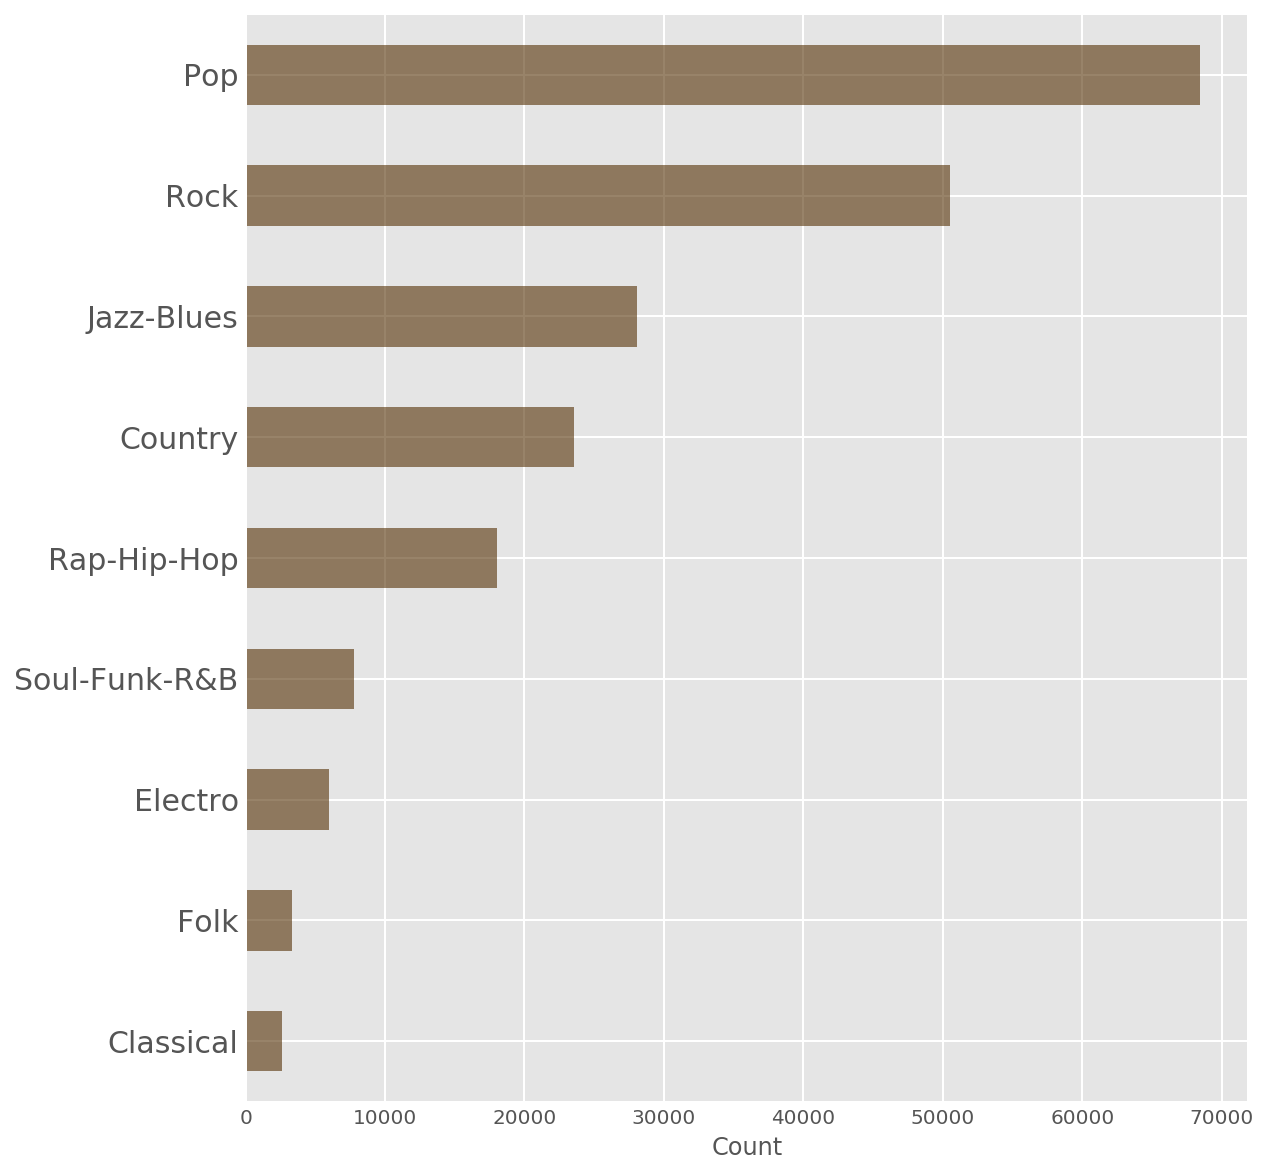

In [51]:
fig = plt.figure(figsize=(8,10))
lyrics.top_genre.value_counts()[::-1].plot('barh', cmap = 'BrBG', alpha = 0.6
                                        );
plt.xlabel('Count')
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 15)

fig.patch.set_alpha(0.0)

In [52]:
#lyrics.to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics_cleaned.csv', index=False)

## NLP

### Engineer features for training set

##### Create numeric target variable

In [53]:
lyrics1 = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics_cleaned.csv')
lyrics1.head()

,band,lyrics,song,top_genre
0,elijah blake,"No, no\r\nI ain't ever trapped out the bando\r...",everyday,Soul-Funk-R&B
1,elijah blake,"The drinks go down and smoke goes up, I feel m...",live till we die,Soul-Funk-R&B
2,elijah blake,She don't live on planet Earth no more\r\nShe ...,the otherside,Soul-Funk-R&B
3,elijah blake,"Trippin' off that Grigio, mobbin', lights low\...",pinot,Soul-Funk-R&B
4,elijah blake,"I see a midnight panther, so gallant and so br...",shadows & diamonds,Soul-Funk-R&B


In [174]:
def genre_to_numeric(genre_series):
    
    conversion_dict = {genre:i for i, genre in enumerate(genre_series.value_counts().index)}
    #print(conversion_dict)
    return genre_series.map(lambda x: conversion_dict[x]), conversion_dict

lyrics1['genre_code'], genre_conversion_dict = genre_to_numeric(lyrics1.top_genre)

In [175]:
lyrics1.head()

,band,lyrics,song,top_genre,genre_code
0,elijah blake,"No, no\r\nI ain't ever trapped out the bando\r...",everyday,R&B,6
1,elijah blake,"The drinks go down and smoke goes up, I feel m...",live till we die,R&B,6
2,elijah blake,She don't live on planet Earth no more\r\nShe ...,the otherside,R&B,6
3,elijah blake,"Trippin' off that Grigio, mobbin', lights low\...",pinot,R&B,6
4,elijah blake,"I see a midnight panther, so gallant and so br...",shadows & diamonds,R&B,6


In [176]:
genre_conversion_dict

{'Pop': 0,
 'Rock': 1,
 'Alternative': 2,
 'Jazz': 3,
 'Country': 4,
 'Rap/Hip Hop': 5,
 'R&B': 6,
 'Electro': 7,
 'Metal': 8,
 'Dance': 9,
 'Folk': 10,
 'Classical': 11,
 'Films/Games': 12,
 'Reggae': 13,
 'Kids': 14,
 'Spirituality & Religion': 15,
 'Latin Music': 16,
 'Soul & Funk': 17,
 'Disco': 18,
 'Blues': 19}

##### Process lyrics to produce text of Lemmas

In [3]:
nlp = textacy.load_spacy('en_core_web_sm')
stopword_list = nltk.corpus.stopwords.words('english')
# remove negation words from stop words because they might be useful in sentiment analysis
stopword_list.remove('no')
stopword_list.remove('not')

#     perform preprocessing with: textacy.preprocess.preprocess_text() followed by further
#     manual contraction expansion.
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def preprocess(text, fix_ASCII = True, fix_unicode=True, lowercase = True, no_contractions=True):
    
    text = textacy.preprocess.preprocess_text(text, 
                                              transliterate=fix_ASCII,
                                              fix_unicode=fix_unicode,
                                              lowercase=lowercase,
                                              no_contractions=no_contractions,
                                              )
    if no_contractions:
        text = expand_contractions(text)
    return text
    

#   Function for multhreaded Tokenisation,  
def tokenise_corpus(documents, pos=False):
    
    texts = []
    tokenised_texts = []

    if pos: # pos can either be False or a list of parts of speech
        for document in tqdm_notebook(nlp.pipe(documents, n_threads=16, batch_size=10000)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token not in stopword_list
                      and token.pos_ in pos]
            
            doc_ = ' '.join([str(token) for token in tokens])
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
    
    
    else:    
        for document in tqdm_notebook(nlp.pipe(documents, n_threads=16, batch_size=10000)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if str(token) not in stopword_list]
            
            doc_ = ' '.join([str(token) for token in tokens])
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
    return texts, tokenised_texts

#function to produce text of lemmas from tokens 
def get_lemma(tokenised_text):
    
        
    text = tokenised_text
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


In [163]:
preprocessed_lyrics = lyrics.lyrics.map(
    
    lambda x: preprocess(x, lowercase =False)
)

preprocessed_lyrics[:20]

0     No, no\nI as not ever trapped out the bando\nB...
1     The drinks go down and smoke goes up, I feel m...
2     She do not live on planet Earth no more\nShe f...
3     Trippin off that Grigio, mobbin, lights low\nT...
4     I see a midnight panther, so gallant and so br...
5     I just want to ready your mind\necause I will ...
6     I watch the leaves fall to the ground\nSuddenl...
7     When I was just a boy,\nEveryone made fun of m...
8     [bonus track]\nBetrayal, you betrayed me\nYou ...
9     A child is born\nOut of the womb of a mother W...
10    Each night I lie in my bed And I think about i...
11    I was walking through the night\nSuddenly I re...
12    Why can not I hear you breath\nWhy can not I h...
13    Your cold cold heart has drowned my life in pa...
14    Peel off my skin, make me helpless\nTaste my b...
15    The long summer\nHas gone\nThe autumn leaves\n...
16    Past is haunting me, fragments of memory\nDist...
17    Do not dare to leave\nYou can not make a s

In [166]:
lyrics, tokenised_lyrics = tokenise_corpus(preprocessed_lyrics)

In [167]:
lyric_lemmas = pd.Series(tokenised_lyrics).map(lambda x: get_lemma(x))

In [177]:
lyrics1['lyrics_clean'] = lyrics
lyrics1['tokenised_lyrics'] = tokenised_lyrics
lyrics1['lyric_lemmas'] = lyric_lemmas

In [185]:
lyrics1 = lyrics1[['band', 'song', 'top_genre', 'genre_code','lyrics', 'lyrics_clean',
       'tokenised_lyrics', 'lyric_lemmas']]

In [186]:
lyrics1.head()

,band,song,top_genre,genre_code,lyrics,lyrics_clean,tokenised_lyrics,lyric_lemmas
0,elijah blake,everyday,R&B,6,"No, no\r\nI ain't ever trapped out the bando\r...","No , no \n I not ever trapped bando \n But oh ...","[No, ,, no, \n, I, not, ever, trapped, bando, ...","no , no \n I not ever trap bando \n but oh lor..."
1,elijah blake,live till we die,R&B,6,"The drinks go down and smoke goes up, I feel m...","The drinks go smoke goes , I feel , got let go...","[The, drinks, go, smoke, goes, ,, I, feel, ,, ...","the drink go smoke go , I feel , get let go \n..."
2,elijah blake,the otherside,R&B,6,She don't live on planet Earth no more\r\nShe ...,She not live planet Earth no \n She found love...,"[She, not, live, planet, Earth, no, \n, She, f...",She not live planet earth no \n She find love ...
3,elijah blake,pinot,R&B,6,"Trippin' off that Grigio, mobbin', lights low\...","Trippin Grigio , mobbin , lights low \n Trippi...","[Trippin, Grigio, ,, mobbin, ,, lights, low, \...","trippin grigio , mobbin , light low \n trippin..."
4,elijah blake,shadows & diamonds,R&B,6,"I see a midnight panther, so gallant and so br...","I see midnight panther , gallant brave \n I fo...","[I, see, midnight, panther, ,, gallant, brave,...","I see midnight panther , gallant brave \n I fi..."


In [187]:
#lyrics1.to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics_tokenised.csv')

##### Compute sentiment of each song using vader

In [200]:
analyser = SentimentIntensityAnalyzer()

lyrics['vader_neg'] = 0
lyrics['vader_pos'] = 0
lyrics['vader_neu'] = 0
lyrics['vader_compound'] = 0

for i, lyric in tqdm_notebook(enumerate(lyrics.lyrics)):
    vs = analyser.polarity_scores(lyric)
    lyrics.iloc[i, -4] = vs['neg']
    lyrics.iloc[i, -3] = vs['pos']
    lyrics.iloc[i, -2] = vs['neu']
    lyrics.iloc[i, -1] = vs['compound']

In [231]:
lyrics.head(1)

,Unnamed: 0,band,song,top_genre,genre_code,lyrics,lyrics_clean,tokenised_lyrics,lyric_lemmas,vader_neg,vader_pos,vader_neu,vader_compound
0,0,elijah blake,everyday,R&B,6,"No, no\r\nI ain't ever trapped out the bando\r...","No , no \n I not ever trapped bando \n But oh ...","[No, ,, no, \n, I, not, ever, trapped, bando, ...","no , no \n I not ever trap bando \n but oh lor...",0.186,0.118,0.695,-0.9864


0    2010
1    2270
2    1476
3    1831
4     885
Name: lyrics, dtype: int64

In [235]:
lyrics['lyric_length'] = lyrics.lyrics.map(lambda x: len(x))

In [17]:
lyrics['top_genre'] = lyrics.top_genre.map(lambda x: aggregate_genres(x))

In [19]:
lyrics.top_genre.value_counts()

Pop              74325
Rock             54433
Jazz             29907
Country          24977
Rap/Hip Hop      19556
Soul/Funk/R&B     8420
Electro           6470
Folk              3646
Classical         2756
Blues               25
Name: top_genre, dtype: int64

In [22]:
lyrics.dropna(inplace=True)

In [30]:
#lyrics.to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics_tokenised_sentiment.csv', index=False)

## NLP and Modeling 

### Import Cleaned Lyrics Dataframe

In [2]:
lyrics = pd.read_csv('../../../../fma_metadata/every-song-you-have-heard-almost/Lyrics_tokenised_sentiment.csv')

In [73]:
lyrics.head(1)

,band,song,top_genre,genre_code,lyrics,lyrics_clean,tokenised_lyrics,lyric_lemmas,vader_neg,vader_pos,vader_neu,vader_compound,lyric_length
0,elijah blake,everyday,Soul-Funk-R&B,6,"No, no\r\nI ain't ever trapped out the bando\r...","No , no \n I not ever trapped bando \n But oh ...","[No, ,, no, \n, I, not, ever, trapped, bando, ...","no , no \n I not ever trap bando \n but oh lor...",0.186,0.118,0.695,-0.9864,2010


##### Retokenise lyrics after import 

In [5]:
tokenised_lyrics = tokenise_corpus(lyrics.lyrics_clean)[1]

### Named Entity Recognition by Genre

In [22]:
lyrics.tokenised_lyrics = tokenised_lyrics

In [20]:
lyrics.top_genre.value_counts()

Pop              73918
Rock             54155
Jazz             29811
Country          24963
Rap-Hip-Hop      19536
Soul-Funk-R&B     8419
Electro           6442
Folk              3644
Classical         2731
Blues               25
Name: top_genre, dtype: int64

In [14]:
lyrics.top_genre.unique()

array(['Soul-Funk-R&B', 'Pop', 'Classical', 'Rock', 'Jazz', 'Electro',
       'Folk', 'Rap-Hip-Hop', 'Country', 'Blues'], dtype=object)

In [23]:
entity_frame = {}
for genre in tqdm_notebook(lyrics.top_genre.unique()):
    named_entities = []
    for lyric in tqdm_notebook(lyrics[lyrics.top_genre == genre].tokenised_lyrics):
        temp_entity_name = ''
        temp_named_entity = None
        for word in lyric:
            term = word.text 
            tag = word.ent_type_
            if tag:
                temp_entity_name = ' '.join([temp_entity_name, term]).strip()
                temp_named_entity = (temp_entity_name, tag)
            else:
                if temp_named_entity:
                    named_entities.append(temp_named_entity)
                    temp_entity_name = ''
                    temp_named_entity = None

    entity_frame[genre] = pd.DataFrame(named_entities, 
                                columns=['Entity Name', 'Entity Type'])
    entity_frame[genre].to_csv('../../../../fma_metadata/every-song-you-have-heard-almost/entity_frame_{}.csv'.format(genre), 
                               index = False)
    
    
    

In [52]:
for genre in lyrics.top_genre.unique():
    print('\n\nMost Frequent Named Entities in {}'.format(genre))

    ipd.display((entity_frame[genre].groupby(by=['Entity Name', 'Entity Type'])
     .size()
     .sort_values(0,ascending = False)
     .reset_index()
     .rename(columns = {0:'frequency'})).iloc[:21,:])






Most Frequent Named Entities in Soul-Funk-R&B


,Entity Name,Entity Type,frequency
0,one,CARDINAL,3076
1,Baby,PRODUCT,1929
2,,TIME,1729
3,tonight,TIME,1583
4,Love,WORK_OF_ART,1177
5,night,TIME,851
6,two,CARDINAL,795
7,first,ORDINAL,772
8,Ooh,ORG,643
9,Now,LOC,525




Most Frequent Named Entities in Pop


,Entity Name,Entity Type,frequency
0,one,CARDINAL,19764
1,tonight,TIME,10614
2,,TIME,10571
3,Love,WORK_OF_ART,6394
4,night,TIME,5972
5,two,CARDINAL,5886
6,Baby,PRODUCT,5817
7,,ORG,5044
8,first,ORDINAL,4751
9,today,DATE,4161




Most Frequent Named Entities in Classical


,Entity Name,Entity Type,frequency
0,one,CARDINAL,549
1,night,TIME,280
2,,TIME,271
3,tonight,TIME,248
4,two,CARDINAL,225
5,Love,WORK_OF_ART,201
6,Christmas,DATE,136
7,One,CARDINAL,125
8,,ORG,116
9,first,ORDINAL,116




Most Frequent Named Entities in Rock


,Entity Name,Entity Type,frequency
0,one,CARDINAL,13043
1,,TIME,6581
2,tonight,TIME,6091
3,night,TIME,3947
4,today,DATE,3133
5,two,CARDINAL,3056
6,Love,WORK_OF_ART,3003
7,,ORG,2904
8,first,ORDINAL,2620
9,Now,LOC,2326




Most Frequent Named Entities in Jazz


,Entity Name,Entity Type,frequency
0,one,CARDINAL,5419
1,,TIME,2594
2,two,CARDINAL,2434
3,night,TIME,2372
4,Love,WORK_OF_ART,2155
5,,ORG,1951
6,tonight,TIME,1422
7,first,ORDINAL,1278
8,today,DATE,1229
9,midnight,TIME,1164




Most Frequent Named Entities in Electro


,Entity Name,Entity Type,frequency
0,one,CARDINAL,1476
1,,TIME,981
2,tonight,TIME,879
3,Love,WORK_OF_ART,576
4,night,TIME,506
5,two,CARDINAL,467
6,Baby,PRODUCT,465
7,first,ORDINAL,321
8,Come,GPE,299
9,today,DATE,282




Most Frequent Named Entities in Folk


,Entity Name,Entity Type,frequency
0,one,CARDINAL,865
1,,TIME,498
2,two,CARDINAL,293
3,first,ORDINAL,283
4,night,TIME,276
5,tonight,TIME,241
6,,ORG,208
7,Love,WORK_OF_ART,175
8,Now,LOC,168
9,morning,TIME,166




Most Frequent Named Entities in Rap-Hip-Hop


,Entity Name,Entity Type,frequency
0,one,CARDINAL,10417
1,,TIME,5590
2,two,CARDINAL,4263
3,first,ORDINAL,3877
4,tonight,TIME,2557
5,Bitch,PERSON,2411
6,Baby,PRODUCT,2392
7,Now,LOC,2319
8,Nigga,ORG,2292
9,Niggas,ORG,1634




Most Frequent Named Entities in Country


,Entity Name,Entity Type,frequency
0,one,CARDINAL,7302
1,,TIME,3271
2,tonight,TIME,2801
3,two,CARDINAL,2595
4,night,TIME,1966
5,first,ORDINAL,1869
6,Baby,PRODUCT,1583
7,today,DATE,1371
8,Love,WORK_OF_ART,1259
9,,ORG,1066




Most Frequent Named Entities in Blues


,Entity Name,Entity Type,frequency
0,The Way Love,WORK_OF_ART,36
1,one,CARDINAL,6
2,tonight,TIME,5
3,Joe,PERSON,5
4,next day,DATE,4
5,today,DATE,4
6,Miss. Lacey Belle,PERSON,4
7,Georgia,FAC,3
8,Georgia,GPE,3
9,Wild,LOC,3


### Set target and predictors

In [6]:
lyrics.head(1)

,band,song,top_genre,genre_code,lyrics,lyrics_clean,tokenised_lyrics,lyric_lemmas,vader_neg,vader_pos,vader_neu,vader_compound,lyric_length
0,elijah blake,everyday,Soul-Funk-R&B,6,"No, no\r\nI ain't ever trapped out the bando\r...","No , no \n I not ever trapped bando \n But oh ...","[No, ,, no, \n, I, not, ever, trapped, bando, ...","no , no \n I not ever trap bando \n but oh lor...",0.186,0.118,0.695,-0.9864,2010


In [4]:
y = lyrics.top_genre.copy()

In [75]:
y.value_counts()

Pop              73918
Rock             54155
Jazz-Blues       29836
Country          24963
Rap-Hip-Hop      19536
Soul-Funk-R&B     8419
Electro           6442
Folk              3644
Classical         2731
Name: top_genre, dtype: int64

In [6]:
def genre_to_numeric(genre_series):
    
    conversion_dict = {genre:i for i, genre in enumerate(genre_series.value_counts().index)}
    #print(conversion_dict)
    return genre_series.map(lambda x: conversion_dict[x]), conversion_dict

In [7]:
y_n, conversion_dict = genre_to_numeric(y)

In [76]:
y_n.value_counts()

0    73918
1    54155
2    29836
3    24963
4    19536
5     8419
6     6442
7     3644
8     2731
Name: top_genre, dtype: int64

In [9]:
conversion_dict

{'Pop': 0,
 'Rock': 1,
 'Jazz-Blues': 2,
 'Country': 3,
 'Rap-Hip-Hop': 4,
 'Soul-Funk-R&B': 5,
 'Electro': 6,
 'Folk': 7,
 'Classical': 8}

In [10]:
#lyric_lemmas = lyrics.lyric_lemmas.copy()

In [11]:
X = lyrics.iloc[:,-6:].copy()

In [77]:
X.shape

(223644, 6)

### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_n, 
                                                    test_size = 0.97,
                                                    stratify = y_n,
                                                    random_state = 1)

X_test, X_validate, y_test,y_validate = train_test_split(X_test,
                                                         y_test,
                                                         test_size = 0.5,
                                                         random_state = 1)

In [78]:
X_train.shape

(6709, 6)

In [79]:
y_train.value_counts()

0    2217
1    1625
2     895
3     749
4     586
5     253
6     193
7     109
8      82
Name: top_genre, dtype: int64

### Try Count Vectoriser 

##### Word counts by genre 

In [80]:
 
stop_words = text.ENGLISH_STOP_WORDS.union(['chorus', 'verse'])
cvec = CountVectorizer(stop_words=stop_words)
cvec.fit(X_train.lyric_lemmas)

words = cvec.get_feature_names()
print(len(words))

cvec_mat = cvec.transform(X_train.lyric_lemmas)
cvec_mat_test = cvec.transform(X_test.lyric_lemmas)

print()
print(cvec_mat.shape)

23944

(6709, 23944)


In [81]:
word_counts = pd.DataFrame(cvec_mat.sum(axis=0), columns=words).T.sort_values(0, ascending=False)
word_counts.columns = ['count']
word_counts.head(10)

,count
love,11817
know,10204
like,8381
oh,6997
say,6418
come,6284
make,6079
time,5618
want,5475
let,4918


In [90]:
fig = plt.figure()
ax = df_word_frequency[0].head(10).plot(kind = 'bar')

TypeError: 'Figure' object is not iterable

<Figure size 432x288 with 0 Axes>

In [82]:
df_word_frequency = {}

for i, genre in enumerate(['Pop','Rock','Jazz','Country','Rap-Hip-Hop']):
    csum_i = cvec_mat[(y_train==i).values,:].sum(axis=0)

    df_word_frequency[i] = pd.DataFrame(csum_i,columns=words).T.sort_values(0,ascending = False)
    df_word_frequency[i].columns = ['frequency']
    print(genre)
    ipd.display(df_word_frequency[i].iloc[:10,:])
    print()

Pop


,frequency
love,4017
know,3497
like,2724
say,2178
come,2100
want,2052
oh,2038
make,2028
time,1985
baby,1638



Rock


,frequency
love,2747
know,2372
like,2011
oh,1715
say,1543
come,1458
make,1345
time,1302
want,1171
let,1130



Jazz


,frequency
love,1471
know,1328
oh,1200
like,1114
say,849
come,831
want,707
make,685
baby,678
time,659



Country


,frequency
love,1435
know,1005
oh,949
like,887
make,791
come,639
say,628
time,624
baby,564
want,559



Rap-Hip-Hop


,frequency
love,971
know,901
like,839
make,652
come,599
say,546
want,521
time,494
let,461
oh,445


##### Basic logistic regression model

In [46]:
lgr = LogisticRegressionCV(Cs = np.logspace(-3,3,5), cv = 5, random_state=1, verbose=1, max_iter=5000, n_jobs=-1)
lgr.fit(cvec_mat, y_train)
print('Train Score:', lgr.score(cvec_mat,y_train))
print('Mean CV Score:', cross_val_score(lgr, cvec_mat, y_train, cv = 5).mean())
print('Test Score:', lgr.score(cvec_mat_test, y_test))


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min finished


Train Score: 0.3857504844239082


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.3min finished


Mean CV Score: 0.3234420734458126
Test Score: 0.32286317497487715


##### More out-of-the-box models

In [166]:
models_list2 = {
                RandomForestClassifier(n_estimators = 1000, max_depth=15, n_jobs=-1, random_state=1),
                SVC(), 
                MultinomialNB(),
               }
CV = 5
cv_df_countvec = pd.DataFrame(index=range(CV * len(models_list2)))
entries = []
for model in tqdm_notebook(models_list2):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, cvec_mat, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df_countvec = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [167]:
cv_df_countvec

,model_name,fold_idx,accuracy
0,MultinomialNB,0,0.284015
1,MultinomialNB,1,0.281250
2,MultinomialNB,2,0.286140
3,MultinomialNB,3,0.277612
4,MultinomialNB,4,0.281016
5,SVC,0,0.330112
6,SVC,1,0.331101
7,SVC,2,0.330849
8,SVC,3,0.330597
9,SVC,4,0.331091


### Try to improve with tf-idf 

##### Word Counts

In [18]:
stop_words = text.ENGLISH_STOP_WORDS.union(['chorus', 'verse','love','know','like','oh','say','come','make','time',
                                            'want','let','heart','day','way','feel','baby','think','tell','good',
                                            'life','away','night''need','thing','look','leave','right','eye','yeah',
                                            'world','man','try','hear','need','night','ecause','hold',
                                            'girl','mind','live','just'])

In [158]:
tfidf = TfidfVectorizer(
                        sublinear_tf=True,
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 4), 
                        stop_words=stop_words
                       )
lyrics_train_tfidf = tfidf.fit_transform(X_train.lyric_lemmas)
lyrics_test_tfidf = tfidf.transform(X_test.lyric_lemmas)

In [137]:
words_tfidf = tfidf.get_feature_names()
word_counts_tfidf = pd.DataFrame(lyrics_train_tfidf.sum(axis=0), columns=words_tfidf).T.sort_values(0, ascending=False)
word_counts_tfidf.columns = ['count']
word_counts_tfidf.head(20)

,count
fall,91.817150
lose,89.125456
wait,82.662393
walk,80.818641
face,76.195721
lie,74.161482
stay,72.795571
old,72.350829
stand,71.394739
friend,70.957424


In [138]:
df_word_frequency_tfidf = {}

for i, genre in enumerate(['Pop','Rock','Jazz','Country','Rap-Hip-Hop']):
    csum_i = lyrics_train_tfidf[(y_train==i).values,:].sum(axis=0)

    df_word_frequency_tfidf[i] = pd.DataFrame(csum_i,columns=words_tfidf).T.sort_values(0,ascending = False)
    df_word_frequency_tfidf[i].columns = ['frequency']
    print(genre)
    ipd.display(df_word_frequency_tfidf[i].iloc[:20,:])
    print()

Pop


,frequency
fall,31.947470
lose,31.833269
wait,29.486717
walk,27.529439
old,24.940354
sweet,24.823426
lie,24.644426
friend,24.641272
face,24.575667
start,24.565634



Rock


,frequency
fall,22.968407
lose,22.669619
lie,20.515791
wait,19.773292
face,19.052589
sun,18.973556
old,18.870201
end,18.299994
friend,17.734569
walk,17.729296



Jazz


,frequency
walk,12.337239
star,11.826410
fall,11.531198
blue,11.251840
lose,11.202027
face,10.985304
die,10.306279
start,10.287961
really,9.686347
wait,9.579836



Country


,frequency
fall,9.964475
old,9.667912
walk,9.665579
wait,9.377436
stay,8.821313
die,8.815962
end,8.264250
new,8.165866
tear,8.155716
star,8.154651



Rap-Hip-Hop


,frequency
lose,8.379911
place,8.283411
really,7.774586
stop,7.718474
stay,7.348927
wanna,7.242282
end,7.165158
friend,6.892794
word,6.785541
face,6.611588


In [139]:
new_stop_words = []
for word in df_word_frequency_tfidf[0].iloc[:20,:].index:
    if word in df_word_frequency_tfidf[1].iloc[:20,:].index and word in df_word_frequency_tfidf[2].iloc[:20,:].index and word in df_word_frequency_tfidf[3].iloc[:20,:].index and word in df_word_frequency_tfidf[4].iloc[:20,:].index:
        new_stop_words.append(word)
        
    

In [147]:
new_stop_words

['fall', 'lose', 'walk']

In [93]:
X_validate.shape

(108468, 6)

In [141]:
lyrics_train_tfidf.shape

(6709, 9437)

##### Check most correlated unigrams and bigrams using Chi square statistics

In [142]:
from sklearn.feature_selection import chi2
import numpy as np
N = 4
for genre, genre_id in sorted(conversion_dict.items()):
    features_chi2 = chi2(lyrics_train_tfidf, y_train == genre_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n# '{}':".format(genre))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


# 'Classical':
  . Most correlated unigrams:
. alter
. tissue
. handful
. blooded
  . Most correlated bigrams:
. bring joy
. neath starry
. close stay
. lay low

# 'Country':
  . Most correlated unigrams:
. dallas
. mami
. southland
. julie
  . Most correlated bigrams:
. road road
. strange new
. magic moment
. water water

# 'Electro':
  . Most correlated unigrams:
. parlor
. negro
. election
. wannabe
  . Most correlated bigrams:
. river sea
. fo sho
. work nigga
. new true

# 'Folk':
  . Most correlated unigrams:
. jon
. homicide
. 26
. astronaut
  . Most correlated bigrams:
. remember really
. ch ch
. use talk
. set set

# 'Jazz-Blues':
  . Most correlated unigrams:
. forgettin
. mood
. louie
. lullaby
  . Most correlated bigrams:
. true real
. far heaven
. tonight wonder
. wonder tonight

# 'Pop':
  . Most correlated unigrams:
. olden
. friendship
. cupid
. completely
  . Most correlated bigrams:
. sunday sunday
. mmm mmm
. hope understand
. big big

# 'Rap-Hip-Hop':
  . Most cor

In [144]:
models_list1 = {
                LogisticRegression(random_state=1, n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                RandomForestClassifier(n_estimators = 1000, max_depth=15, n_jobs=-1, random_state=1)
               #'XG Boost':
               }
models_list2 = {
                SVC(), 
                MultinomialNB(),
                XGBClassifier(n_estimators=300, n_jobs=-1)
               }
CV = 5
#cv_df2 = pd.DataFrame(index=range(CV * len(models_list1)))
#entries = []
for model in tqdm_notebook(models_list2):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, lyrics_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/ahoward/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ahoward/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ahoward/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ahoward/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

In [146]:
cv_df2.groupby('model_name').mean()[['accuracy']].sort_values('accuracy', ascending = False)

,accuracy
model_name,
RandomForestClassifier,0.330452
SVC,0.330452
MultinomialNB,0.324346
KNeighborsClassifier,0.321973
XGBClassifier,0.312557
LogisticRegression,0.305271


In [153]:
#cv_df2.to_csv('cv_df2_stops.csv')

In [73]:
cv_df = pd.concat([cv_df,cv_df2])

In [151]:
cv_df.groupby('model_name').mean()[['accuracy']].sort_values('accuracy', ascending = False)

,accuracy
model_name,
SVC,0.330452
RandomForestClassifier,0.330303
MultinomialNB,0.327175
LogisticRegression,0.312876
XGBClassifier,0.307500
KNeighborsClassifier,0.292119


In [152]:
#cv_df.to_csv('cv_df_nostop.csv')

In [79]:
y_n.value_counts(normalize=True)

0    0.330516
1    0.242148
2    0.133408
3    0.111619
4    0.087353
5    0.037645
6    0.028805
7    0.016294
8    0.012211
Name: top_genre, dtype: float64

##### Increase n_grams

In [16]:
X.head()

,lyric_lemmas,vader_neg,vader_pos,vader_neu,vader_compound,lyric_length
0,"no , no \n I not ever trap bando \n but oh lor...",0.186,0.118,0.695,-0.9864,2010
1,"the drink go smoke go , I feel , get let go \n...",0.245,0.098,0.657,-0.9983,2270
2,She not live planet earth no \n She find love ...,0.158,0.029,0.813,-0.9915,1476
3,"trippin grigio , mobbin , light low \n trippin...",0.173,0.094,0.733,-0.9775,1831
4,"I see midnight panther , gallant brave \n I fi...",0.091,0.400,0.509,0.9964,885


In [19]:
tfidf = TfidfVectorizer(
                        sublinear_tf=False,
                        #min_df=5, 
                        #norm='l2', 
                        #encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words= stop_words
                       )
tfidf.fit(pd.concat([X_train.lyric_lemmas,X_test.lyric_lemmas]))
lyrics_train_tfidf = tfidf.transform(X_train.lyric_lemmas)
lyrics_test_tfidf = tfidf.transform(X_validate.lyric_lemmas)

In [20]:
lyrics_train_tfidf.shape

(6709, 2596042)

In [21]:
lyrics_test_tfidf.shape

(108468, 2596042)

In [175]:
models_list2 = {
                RandomForestClassifier(n_estimators = 300, max_depth=5, n_jobs=-1, random_state=1),
                SVC(), 
                MultinomialNB(),
               }
CV = 5
cv_df3 = pd.DataFrame(index=range(CV * len(models_list2)))
entries = []
for model in tqdm_notebook(models_list2):
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, lyrics_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df3 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [176]:
cv_df3.groupby('model_name').mean()[['accuracy']].sort_values('accuracy', ascending = False)

,accuracy
model_name,
RandomForestClassifier,0.330452
SVC,0.330452
MultinomialNB,0.328072


In [177]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth=15, n_jobs=-1, random_state=1)
rf.fit(lyrics_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [178]:
rf.score(lyrics_test_tfidf, y_validate)

0.3299221890327101

In [179]:
yh_validate = rf.predict(lyrics_test_tfidf)

In [180]:
pd.DataFrame(confusion_matrix(y_validate, yh_validate))

,0,1,2,3,4,5,6,7,8
0,35786,0,0,0,0,0,0,0,0
1,26222,0,0,0,0,0,0,0,0
2,14513,0,0,0,0,0,0,0,0
3,12070,0,0,0,0,0,0,0,0
4,9537,0,0,0,0,0,0,0,0
5,4078,0,0,0,0,0,0,0,0
6,3143,0,0,0,0,0,0,0,0
7,1794,0,0,0,0,0,0,0,0
8,1325,0,0,0,0,0,0,0,0


In [79]:
y_n.value_counts(normalize=True)

0    0.330516
1    0.242148
2    0.133408
3    0.111619
4    0.087353
5    0.037645
6    0.028805
7    0.016294
8    0.012211
Name: top_genre, dtype: float64

##### Neural net

In [159]:
lyrics_train_tfidf.shape

(6709, 11350)

In [162]:
clf = MLPClassifier(solver='adam', 
                    alpha=10**(0),
                    hidden_layer_sizes=(100,100,100,100,100), 
                    activation='relu', 
                    random_state=1,
                    batch_size=50,
                    max_iter=500)
clf.fit(lyrics_train_tfidf, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [163]:
clf.score(lyrics_train_tfidf, y_train)

0.3304516321359368

##### Balance classes by undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
sample = RandomUnderSampler(random_state=1)

X_train_balanced, X_test_unbalanced, y_train_balanced, y_test_unbalanced = train_test_split(X,
                                                    y_n, 
                                                    test_size = 0.2,
                                                    stratify = y_n,
                                                    random_state = 1)

X_test_unbalanced, X_validate_unbalanced, y_test_unbalanced,y_validate_unbalanced = train_test_split(X_test_unbalanced,
                                                         y_test_unbalanced,
                                                         test_size = 0.5,
                                                         random_state = 1)

In [24]:
X_test_unbalanced = tfidf.transform(X_test_unbalanced.lyric_lemmas)

In [25]:
X_test_unbalanced

<22364x2596042 sparse matrix of type '<class 'numpy.float64'>'
	with 1826030 stored elements in Compressed Sparse Row format>

In [26]:
X_train_balanced.shape

(178915, 6)

In [27]:
y_train_balanced.value_counts()

0    59134
1    43324
2    23869
3    19970
4    15629
5     6735
6     5154
7     2915
8     2185
Name: top_genre, dtype: int64

In [28]:
X_test_unbalanced.shape

(22364, 2596042)

In [29]:
X_train_balanced = tfidf.transform(X_train_balanced.lyric_lemmas)

In [30]:
X_train_balanced, y_train_balanced = sample.fit_sample(X_train_balanced, y_train_balanced)

In [31]:
X_train_balanced.shape

(19665, 2596042)

In [32]:
pd.Series(y_train_balanced).value_counts()

8    2185
7    2185
6    2185
5    2185
4    2185
3    2185
2    2185
1    2185
0    2185
dtype: int64

In [211]:
rf = RandomForestClassifier(n_estimators = 1000, n_jobs=-1, random_state=1)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

##### Tune Random Forest

In [258]:
rf = RandomForestClassifier(n_estimators = 300, random_state=1)

params = {
    'max_depth':[5,7,10,12,15]
    #'max_features':[0.1,0.5,1.0],
    #'min_samples_split':[2,10,20],
    #'min_samples_leaf':[1,10,20]
}

gs = GridSearchCV(rf, params, cv =5, verbose = 10, n_jobs=-1)

gs.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=5 .....................................................
[CV] max_depth=7 .....................................................
[CV] max_depth=7 .....................................................
[CV] max_depth=7 .....................................................
[CV] ........... max_depth=5, score=0.12356979405034325, total= 1.1min
[CV] max_depth=7 .....................................................
[CV] ........... max_depth=5, score=0.11594202898550725, total= 1.1min
[CV] max_depth=7 .....................................................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min


[CV] ........... max_depth=5, score=0.11568777015001272, total= 1.2min
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=5, score=0.12102720569539792, total= 1.2min
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=5, score=0.11924739384693618, total= 1.3min
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=7, score=0.11594202898550725, total= 2.1min
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=7, score=0.11492499364352911, total= 2.2min
[CV] max_depth=10 ....................................................
[CV] ........... max_depth=7, score=0.11899313501144165, total= 2.3min
[CV] max_depth=12 ....................................................
[CV] ........... max_depth=7, score=0.12204424103737604, total= 2.1min
[CV] max_depth=12 ....................................................


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min


[CV] ........... max_depth=7, score=0.12204424103737604, total= 2.3min
[CV] max_depth=12 ....................................................
[CV] .......... max_depth=10, score=0.11772184083396899, total= 3.3min
[CV] max_depth=12 ....................................................
[CV] .......... max_depth=10, score=0.11797609966946351, total= 3.9min
[CV] max_depth=12 ....................................................
[CV] .......... max_depth=10, score=0.12306127637935418, total= 4.1min
[CV] max_depth=15 ....................................................


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  6.0min remaining:  5.5min


[CV] .......... max_depth=10, score=0.11467073480803458, total= 3.5min
[CV] max_depth=15 ....................................................
[CV] .......... max_depth=10, score=0.11924739384693618, total= 3.6min
[CV] max_depth=15 ....................................................
[CV] .......... max_depth=12, score=0.12204424103737604, total= 5.1min
[CV] max_depth=15 ....................................................


[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:  7.9min remaining:  4.4min


[CV] ........... max_depth=12, score=0.1278921942537503, total= 4.4min
[CV] max_depth=15 ....................................................
[CV] .......... max_depth=12, score=0.12433257055682685, total= 4.9min
[CV] .......... max_depth=12, score=0.12178998220188152, total= 4.5min


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  9.7min remaining:  3.1min


[CV] .......... max_depth=12, score=0.11517925247902365, total= 4.6min
[CV] .......... max_depth=15, score=0.12077294685990338, total= 5.6min
[CV] .......... max_depth=15, score=0.12382405288583778, total= 6.3min


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed: 12.4min remaining:  1.7min


[CV] .......... max_depth=15, score=0.11339944063056191, total= 6.3min
[CV] .......... max_depth=15, score=0.12128146453089245, total= 5.2min
[CV] .......... max_depth=15, score=0.12051868802440885, total= 5.4min


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 7, 10, 12, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [259]:
gs.best_score_

0.12224764810577167

In [239]:
np.linspace(0.1,1,5)

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [233]:
rf.score(X_test_unbalanced, y_test_unbalanced)

0.11147379717402969

In [234]:
rf.score(X_train_balanced, y_train_balanced)

0.7100432240020341

In [ ]:
cros

In [235]:
yh_test = rf.predict(X_test_unbalanced)

In [236]:
yh_train = rf.predict(X_train_balanced)

In [237]:
pd.DataFrame(confusion_matrix(y_train_balanced, yh_train))

,0,1,2,3,4,5,6,7,8
0,1517,48,55,260,55,88,79,44,39
1,57,1488,57,293,57,77,73,45,38
2,56,52,1543,250,41,85,66,50,42
3,49,56,41,1733,48,87,68,59,44
4,60,52,69,244,1547,84,62,33,34
5,53,49,48,268,50,1596,62,26,33
6,67,52,64,270,48,73,1534,37,40
7,71,49,50,243,48,79,61,1545,39
8,61,74,66,279,53,80,69,43,1460


In [ ]:
#### pd.DataFrame(confusion_matrix(y_test_unbalanced, yh_test))

##### Tune Multilayer Perceptron

In [33]:
X_train_balanced.shape

(19665, 2596042)

In [34]:
clf = MLPClassifier(solver='adam', 
                    alpha=10**(0),
                    hidden_layer_sizes=(100), 
                    activation='relu', 
                    random_state=1,
                    batch_size=50,
                    max_iter=200)
clf.fit(X_train_balanced, y_train_balanced)

/Users/ahoward/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=1, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

##### Word counts and wordclouds by genre

In [41]:
y_test_unbalanced.shape

(22364,)

In [47]:
words_tfidf = tfidf.get_feature_names()
word_counts = pd.DataFrame(X_test_unbalanced.sum(axis=0), columns=words_tfidf).T.sort_values(0, ascending=False)
word_counts.columns = ['count']
print('Word Counts for Full Corpus')
ipd.display(word_counts.head(10))
print('='*234)
print()

df_word_frequency = {}

for genre, i_d in conversion_dict.items():
    csum_i = X_test_unbalanced[(y_test_unbalanced==i_d).values,:].sum(axis=0)

    df_word_frequency[genre] = pd.DataFrame(csum_i,columns=words_tfidf).T.sort_values(0,ascending = False)
    df_word_frequency[genre].columns = ['frequency']
    print(genre)
    ipd.display(df_word_frequency[genre].head(10))
    print('-'*117)
    print()



Word Counts for Full Corpus


,count
dream,189.842943
long,184.906563
fall,173.643138
little,168.703411
home,150.910327
lose,149.358353
wait,148.001604
turn,145.371842
light,143.196523
believe,139.513587



Pop


,frequency
dream,63.985503
long,63.148866
fall,57.047366
little,55.148610
home,49.983706
lose,49.594295
turn,49.561066
wait,49.111415
light,46.856850
walk,46.371560


---------------------------------------------------------------------------------------------------------------------

Rock


,frequency
dream,45.821320
little,42.257359
long,41.920329
fall,40.598250
home,40.171742
turn,37.064165
lose,36.700734
wait,36.353294
light,34.977564
run,34.309291


---------------------------------------------------------------------------------------------------------------------

Jazz-Blues


,frequency
long,24.651159
fall,22.972725
dream,22.841624
little,21.812267
home,19.192588
light,18.488580
turn,18.355398
wait,18.205855
stay,17.986167
walk,17.960062


---------------------------------------------------------------------------------------------------------------------

Country


,frequency
fall,22.131577
long,22.075926
dream,21.731676
believe,19.222292
lose,19.003631
little,18.953066
walk,17.138275
home,17.083902
hand,16.270390
light,16.218750


---------------------------------------------------------------------------------------------------------------------

Rap-Hip-Hop


,frequency
dream,17.069699
long,15.361355
fall,15.279393
wait,15.278584
little,15.154874
light,13.143187
turn,12.799133
run,12.697439
lose,12.514786
hand,12.083952


---------------------------------------------------------------------------------------------------------------------

Soul-Funk-R&B


,frequency
dream,7.836879
long,6.989940
light,6.768183
little,6.384990
wait,6.236490
fall,6.216614
believe,6.081029
blue,5.840691
break,5.591153
home,5.574662


---------------------------------------------------------------------------------------------------------------------

Electro


,frequency
dream,5.186723
long,4.914623
little,4.866350
wanna,4.719835
turn,4.677983
run,4.591150
walk,4.443728
hey,4.329844
fall,4.253254
really,4.208323


---------------------------------------------------------------------------------------------------------------------

Folk


,frequency
fall,3.159732
dream,3.118695
blue,3.013576
long,2.947475
little,2.933505
hey,2.532888
lose,2.500389
touch,2.473770
lonely,2.462092
high,2.411998


---------------------------------------------------------------------------------------------------------------------

Classical


,frequency
long,2.896890
wait,2.737252
hand,2.370896
run,2.333094
dream,2.250824
old,2.203540
lose,2.082580
true,2.017641
fall,1.984229
place,1.864473


---------------------------------------------------------------------------------------------------------------------



In [260]:
conversion_dict

{'Pop': 0,
 'Rock': 1,
 'Jazz-Blues': 2,
 'Country': 3,
 'Rap-Hip-Hop': 4,
 'Soul-Funk-R&B': 5,
 'Electro': 6,
 'Folk': 7,
 'Classical': 8}

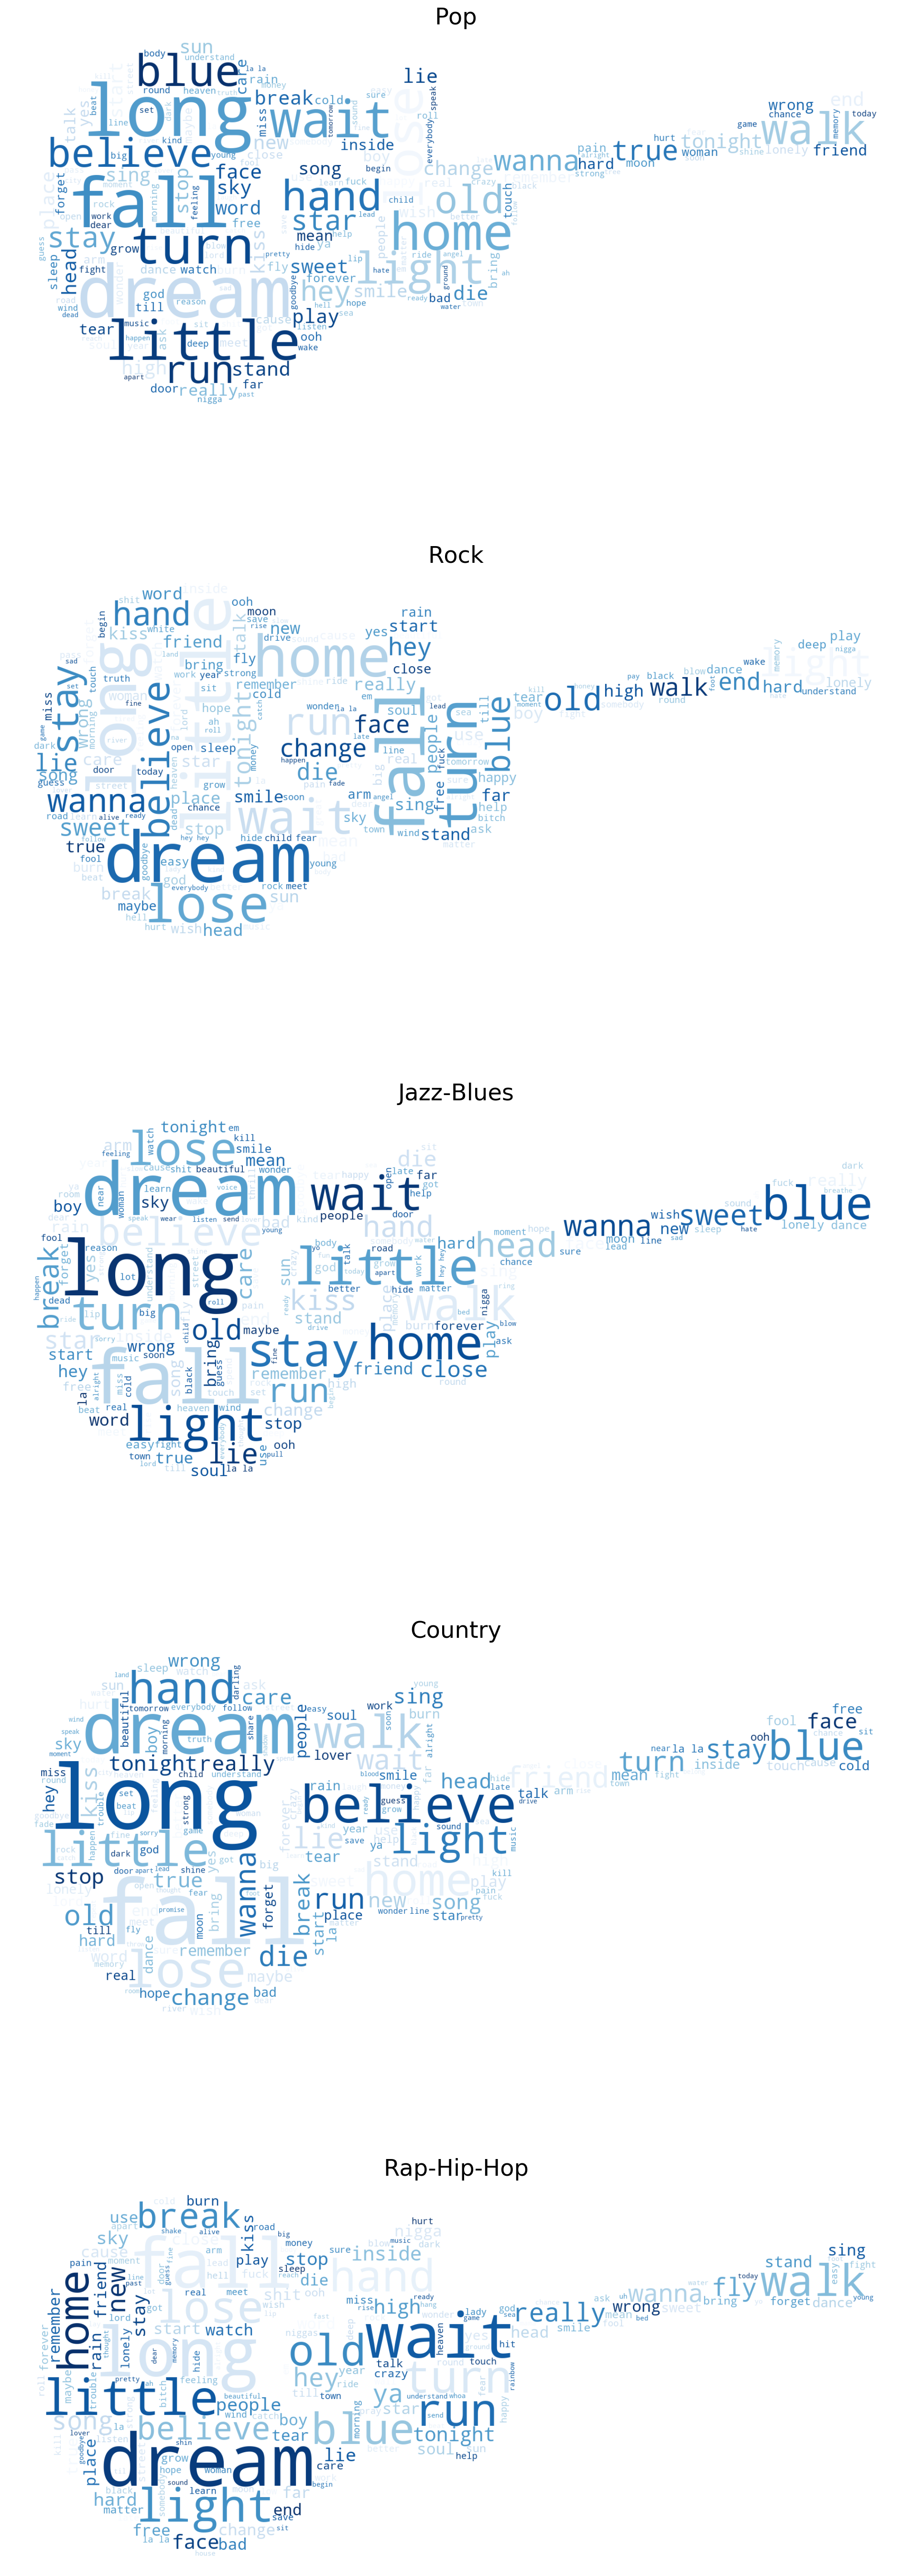

In [62]:
from wordcloud import WordCloud, ImageColorGenerator
from os import path, getcwd
from PIL import Image

d = getcwd()
mask = np.array(Image.open(path.join(d, "guitar7.png")))

wc_gen = {}
wc = WordCloud(mask = mask,background_color='white',colormap='Blues',random_state=2)

fig, ax = plt.subplots(nrows=5,figsize=(15,50))


for genre, i_d in [x for x in conversion_dict.items()][:5]:
    wc_gen[genre] = wc.generate_from_frequencies(dict(df_word_frequency[genre].reset_index().values))
    ax[i_d].imshow(wc_gen[genre], interpolation = 'bilinear')
    ax[i_d].set_title(genre,fontsize=24)
    ax[i_d].set_xticks([])
    ax[i_d].set_yticks([])
    ax[i_d].patch.set_alpha(0.0)
    





### Try Model w. Sentiment Features+Lyric Length Feature

In [102]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X[[x for x in X.columns if x != 'lyric_lemmas']],
                                                    y_n, 
                                                    test_size = 0.8,
                                                    stratify = y_n,
                                                    random_state = 1)

X_test_sent, X_validate_sent, y_test_sent,y_validate_sent = train_test_split(X_test_sent,
                                                         y_test_sent,
                                                         test_size = 0.5,
                                                         random_state = 1)

scale = StandardScaler()

X_train_sent = scale.fit_transform(X_train_sent)
X_test_sent = scale.transform(X_test_sent)

In [103]:
X_train_sent.shape

(44728, 5)

In [105]:
models_list1 = {
                LogisticRegression(random_state=1, n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                RandomForestClassifier(n_estimators = 1000, max_depth=15, n_jobs=-1, random_state=1)
               }
models_list2 = {
                SVC(), 
                MultinomialNB(),
                XGBClassifier(n_estimators=300, n_jobs=-1)
               }

CV = 5
cv_df_sent = pd.DataFrame(index=range(CV * len(models_list2)))

#entries = []

In [165]:
# for model in tqdm_notebook(models_list2):
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, X_train_sent, y_train_sent, scoring='accuracy', cv=CV)
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))
# cv_df_sent = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [97]:
cv_df_sent.groupby('model_name').mean()[['accuracy']].sort_values('accuracy', ascending = False)

,accuracy
model_name,
SVC,0.330452
RandomForestClassifier,0.330303
MultinomialNB,0.327175
LogisticRegression,0.312876
XGBClassifier,0.307500
KNeighborsClassifier,0.292119


In [154]:
#cv_df_sent.to_csv('cv_df_sent.csv')